**Aluno**: João Paulo Epifani Veloso

**Kaggle**: https://www.kaggle.com/datasets/muratkokludataset/pistachio-dataset

O Projeto Final dessa Disciplina consistirá na escolha de um Dataset e realização do treinamento de um modelo que resolva o dataset escolhido utilizando Redes Neurais (sem Convolução).

Você tem a liberdade de escolher qualquer dataset, entretanto, atente-se para a complexidade não ser mutio alta e você conseguir resolver sem utilização de redes profundas.


**Você deve:**
* Criar um Jupyter Notebook
* O primeiro bloco desse notebook deve conter: Nome, Email (de todos os integrantes do grupo) e o link para o Dataset Escolhido.
* Nesse jupyter notebook você deverá fazer: (i) o carregamento do dataset e quaisquer manipulações que ache necessário fazer com os dados; (ii) a definição do modelo de redes neurais utilizada para treinar o modelo; (iii) o treinamento do modelo; (iv) uma análise simples da performance com no mínimo acurária e perda (ou pode adicionar outras métricas, como matriz de confusão, outros gráficos etc)
* Depois do treinamento, você deve escrever no mínimo um parágrafo explicando como foi o processo e sua experiência: quais dificuldades teve, se teve overfitting ou underfitting e se teve que fazer ajustes etc.
* Fazer o upload desse notebook no seu repositório do GitHub (conforme explicado aqui: https://classroom.google.com/c/NjY0NzUzNTIzNTQ4/m/NzI4OTkxOTg0MjU4/details) dentro de uma pasta chamada "Trabalho Final".
* Submeter o link para o arquivo no Github nessa entrega.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# prompt: monte um google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/Pistachio_28_Features_Dataset - Pistachio_28_Features_Dataset.csv")

df.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,"1568,405","390,3396","236,7461","0,7951","284,0984","0,8665",73160,"0,6394","1,6488",...,"17,7206","19,6024","21,1342","0,4581","0,6635","0,7591","2,9692","3,0576","2,9542",Kirmizi_Pistachio
1,68358,"1942,187","410,8594","234,7525","0,8207","295,0188","0,8765",77991,"0,6772","1,7502",...,"26,7061","27,2112","25,1035","-0,3847","-0,2713","-0,2927","1,9807","2,1006","2,2152",Kirmizi_Pistachio
2,73589,"1246,538","452,363","220,5547","0,8731","306,0987","0,9172",80234,"0,7127","2,051",...,"19,0129","20,0703","20,7006","-0,6014","-0,45","0,2998","3,542","3,6856","4,1012",Kirmizi_Pistachio
3,71106,"1445,261","429,5291","216,0765","0,8643","300,8903","0,9589",74153,"0,7028","1,9879",...,"18,1773","18,7152","29,7883","-0,6943","-0,6278","-0,7798","2,8776","2,8748","2,8953",Kirmizi_Pistachio
4,80087,"1251,524","469,3783","220,9344","0,8823","319,3273","0,9657",82929,"0,7459","2,1245",...,"23,4298","24,0878","23,1157","-0,9287","-0,8134","-0,497","2,9915","2,8813","2,7362",Kirmizi_Pistachio


# Manipulação dos Dados

In [ ]:
# Verificar se há valores nulos
print(df.isnull().sum())

Area             0
Perimeter        0
Major_Axis       0
Minor_Axis       0
Eccentricity     0
Eqdiasq          0
Solidity         0
Convex_Area      0
Extent           0
Aspect_Ratio     0
Roundness        0
Compactness      0
Shapefactor_1    0
Shapefactor_2    0
Shapefactor_3    0
Shapefactor_4    0
Mean_RR          0
Mean_RG          0
Mean_RB          0
StdDev_RR        0
StdDev_RG        0
StdDev_RB        0
Skew_RR          0
Skew_RG          0
Skew_RB          0
Kurtosis_RR      0
Kurtosis_RG      0
Kurtosis_RB      0
Class            0
dtype: int64


In [ ]:
print("Shape do DataFrame:")
print(df.shape)

Shape do DataFrame:
(2148, 29)


In [ ]:
df['Class'].value_counts()

,count
Class,
Kirmizi_Pistachio,1232
Siirt_Pistachio,916


In [ ]:
print(df.dtypes)

Area              int64
Perimeter        object
Major_Axis       object
Minor_Axis       object
Eccentricity     object
Eqdiasq          object
Solidity         object
Convex_Area       int64
Extent           object
Aspect_Ratio     object
Roundness        object
Compactness      object
Shapefactor_1    object
Shapefactor_2    object
Shapefactor_3    object
Shapefactor_4    object
Mean_RR          object
Mean_RG          object
Mean_RB          object
StdDev_RR        object
StdDev_RG        object
StdDev_RB        object
Skew_RR          object
Skew_RG          object
Skew_RB          object
Kurtosis_RR      object
Kurtosis_RG      object
Kurtosis_RB      object
Class            object
dtype: object


In [ ]:
desc_stats = df.describe()
print(desc_stats)

                Area    Convex_Area
count    2148.000000    2148.000000
mean    79950.655493   85015.839851
std     13121.737799   13154.919327
min     29808.000000   37935.000000
25%     71936.750000   76467.000000
50%     79905.500000   85075.500000
75%     89030.500000   93893.500000
max    124008.000000  132478.000000


In [ ]:
# Verificação de valores NA
missing_counts = df.isna().sum()
print("Quantidade de valores ausentes por coluna:\n", missing_counts)

Quantidade de valores ausentes por coluna:
 Area             0
Perimeter        0
Major_Axis       0
Minor_Axis       0
Eccentricity     0
Eqdiasq          0
Solidity         0
Convex_Area      0
Extent           0
Aspect_Ratio     0
Roundness        0
Compactness      0
Shapefactor_1    0
Shapefactor_2    0
Shapefactor_3    0
Shapefactor_4    0
Mean_RR          0
Mean_RG          0
Mean_RB          0
StdDev_RR        0
StdDev_RG        0
StdDev_RB        0
Skew_RR          0
Skew_RG          0
Skew_RB          0
Kurtosis_RR      0
Kurtosis_RG      0
Kurtosis_RB      0
Class            0
dtype: int64


In [ ]:
df['Class']

,Class
0,Kirmizi_Pistachio
1,Kirmizi_Pistachio
2,Kirmizi_Pistachio
3,Kirmizi_Pistachio
4,Kirmizi_Pistachio
...,...
2143,Siirt_Pistachio
2144,Siirt_Pistachio
2145,Siirt_Pistachio
2146,Siirt_Pistachio


# Padronização dos dados

In [ ]:
# Padronizar as colunas numéricas
numeric_columns = df.columns.difference(['Class'])

for col in numeric_columns:
    # Check if the column type is object (string) before applying str.replace
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', '.', regex=False), errors='coerce')
    else:
        # If not an object, assume it's already numeric and skip the string replacement
        pass

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Codificar a variável Class
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Verificar os dados após a padronização e codificação
print(df.head())
print(df['Class'].unique())

       Area  Perimeter  Major_Axis  Minor_Axis  Eccentricity   Eqdiasq  \
0 -1.262296   0.379338   -1.723590   -0.051668     -0.925560 -1.257169   
1 -0.883675   1.374821   -1.090999   -0.117456     -0.400406 -0.851241   
2 -0.484931  -0.477881    0.188485   -0.585974      0.674518 -0.439385   
3 -0.674203   0.051373   -0.515445   -0.733752      0.493996 -0.632989   
4  0.010393  -0.464602    0.713037   -0.573444      0.863245  0.052342   

   Solidity  Convex_Area    Extent  Aspect_Ratio  ...  StdDev_RR  StdDev_RG  \
0 -1.459003    -0.901457 -1.459763     -1.038784  ...  -1.170254  -0.825391   
1 -1.260749    -0.534133 -0.740038     -0.616362  ...   1.703189   1.275687   
2 -0.453857    -0.363587 -0.064106      0.636739  ...  -0.756994  -0.696186   
3  0.372861    -0.825955 -0.252605      0.373871  ...  -1.024208  -1.070381   
4  0.507673    -0.158673  0.568033      0.942933  ...   0.655472   0.413198   

   StdDev_RB   Skew_RR   Skew_RG   Skew_RB  Kurtosis_RR  Kurtosis_RG  \
0  -0.32

# Remoção de colunas desnecessárias

In [ ]:
columns_to_remove_low_variance = ['SkewRB', 'SkewRR', 'SkewRG',
                   'KurtosisRB', 'KurtosisRR', 'KurtosisRG',
                   'SHAPEFACTOR_2', 'Shapefactor_3' 'SOLIDITY', 'SHAPEFACTOR_1', 'SHAPEFACTOR_4']

# Check if the columns exist in the DataFrame before dropping
columns_to_remove = [col for col in columns_to_remove_low_variance if col in df.columns]

df_clean = df.drop(columns=columns_to_remove)

print(f"Colunas removidas: {columns_to_remove}")
print(f"Dimensões do dataframe original: {df.shape}")
print(f"Dimensões do dataframe reduzido: {df_clean.shape}") # Corrected to df_clean

Colunas removidas: []
Dimensões do dataframe original: (2148, 29)
Dimensões do dataframe reduzido: (2148, 29)


# Definição do modelo de redes neurais para treinar o modelo

In [ ]:
X = df_clean.drop(columns=['Class'])
y = df_clean['Class']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Dropout para evitar overfitting

# Adicionar mais uma camada oculta
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Adicionar a camada de saída
model.add(Dense(len(df_clean['Class'].unique()), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,002 (15.63 KB)

 Trainable params: 4,002 (15.63 KB)

 Non-trainable params: 0 (0.00 B)

# Treinando o modelo

In [ ]:
history = model.fit(X_train, y_train, epochs=55, batch_size=35, validation_data=(X_test, y_test))

Epoch 1/55
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6790 - loss: 0.5652 - val_accuracy: 0.8860 - val_loss: 0.2862
Epoch 2/55
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8815 - loss: 0.3023 - val_accuracy: 0.9093 - val_loss: 0.2440
Epoch 3/55
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8932 - loss: 0.2766 - val_accuracy: 0.9140 - val_loss: 0.2277
Epoch 4/55
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9007 - loss: 0.2620 - val_accuracy: 0.9186 - val_loss: 0.2148
Epoch 5/55
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9112 - loss: 0.2291 - val_accuracy: 0.9209 - val_loss: 0.2066
Epoch 6/55
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9061 - loss: 0.2270 - val_accuracy: 0.9279 - val_loss: 0.1995
Epoch 7/55
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9156 - loss: 0.2317 - val_accuracy: 0.9349 - val_loss: 0.1905
Epoch 8/55
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9011 - loss: 0.2501 - val_accuracy: 0.9349 - val_loss:

# Análise do treinamento do modelo:

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9563 - loss: 0.0968 
Perda: 0.1235
Acurácia: 0.9488
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusão:
[[231  13]
 [  9 177]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       244
           1       0.93      0.95      0.94       186

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430



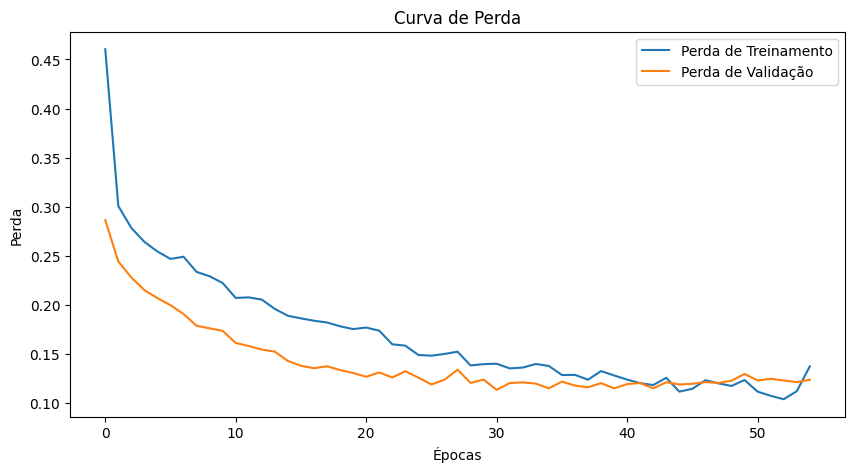

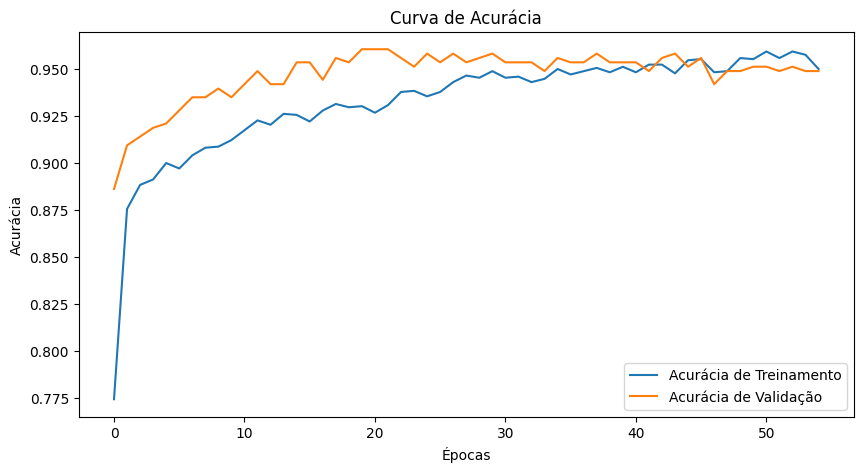

O modelo apresenta indícios de overfitting.

Resumo Inteligente:
O modelo alcançou uma acurácia de 0.95 nos dados de teste, com uma perda de 0.12.
A análise das curvas de perda e acurácia indica que o modelo converge, com os indicadores de treinamento e validação próximos.
A matriz de confusão e o relatório de classificação fornecem uma visão detalhada da performance do modelo para cada classe.


In [ ]:
# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perda: {loss:.4f}")
print(f"Acurácia: {accuracy:.4f}")

# Previsões do modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_classes)
print("Matriz de Confusão:")
print(cm)

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_classes))


# Gráfico da perda
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Curva de Perda')
plt.show()

# Gráfico da acurácia
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Curva de Acurácia')
plt.show()

# Análise de Overfitting
if max(history.history['val_loss']) > min(history.history['loss']):
    print("O modelo apresenta indícios de overfitting.")

# Resumo inteligente
print("\nResumo Inteligente:")
print(f"O modelo alcançou uma acurácia de {accuracy:.2f} nos dados de teste, com uma perda de {loss:.2f}.")
print("A análise das curvas de perda e acurácia indica que o modelo converge, com os indicadores de treinamento e validação próximos.") # Adicionar a análise de overfitting aqui
print("A matriz de confusão e o relatório de classificação fornecem uma visão detalhada da performance do modelo para cada classe.")

# Análise gráfica das métricas de treinamento

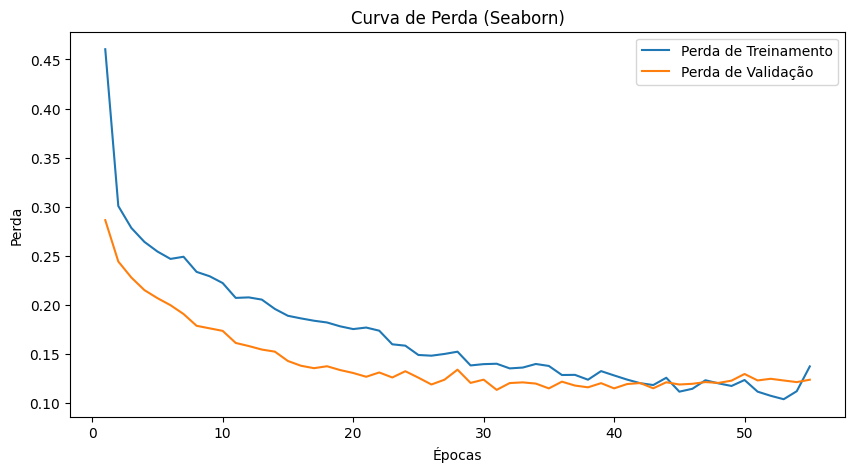

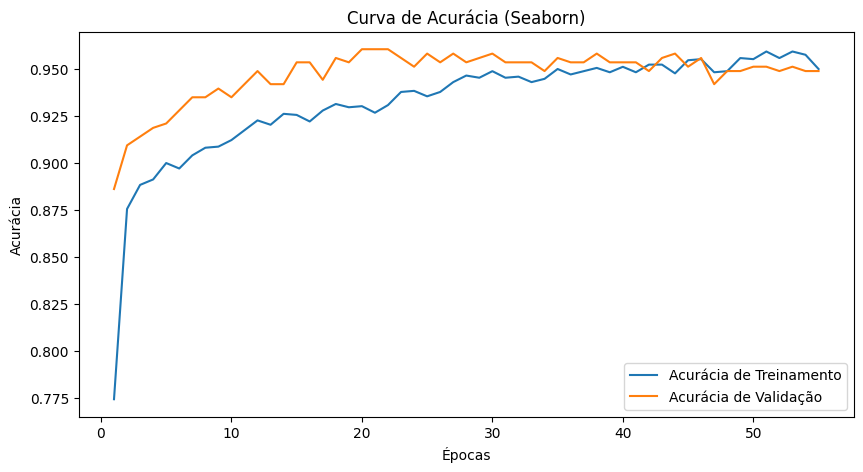

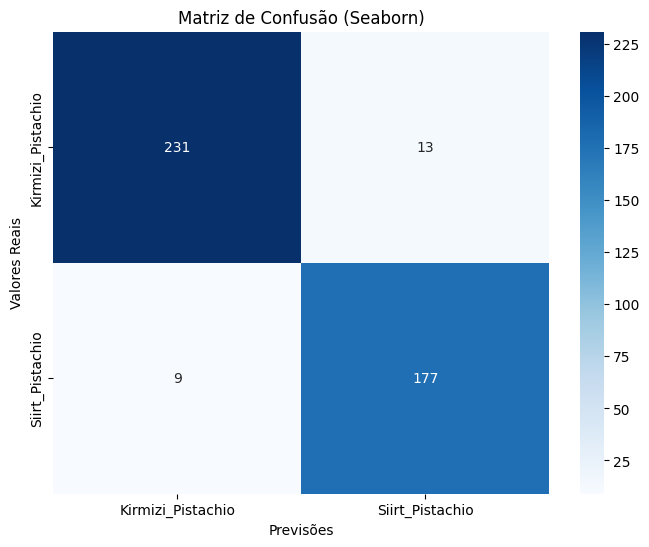

In [ ]:
# Gráfico da perda com seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Perda de Treinamento')
sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Curva de Perda (Seaborn)')
plt.show()

# Gráfico da acurácia com seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Acurácia de Treinamento')
sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Curva de Acurácia (Seaborn)')
plt.show()

# Matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão (Seaborn)')
plt.show()

# Resultados dos gráficos:

* A matriz de confusão mostra um bom desempenho do modelo, com alta quantidade de previsões corretas (231 e 177) e poucos erros (13 e 9). Isso indica que o modelo é eficiente em classificar as categorias analisadas.
* A curva de acurácia exibe um crescimento estável durante as épocas, com a acurácia de validação mantendo-se próxima à de treinamento, o que sugere que o modelo não está superajustado.
* A curva de perda apresenta uma redução significativa tanto na perda de treinamento quanto na validação, indicando que o modelo está aprendendo de forma eficiente.
* A proximidade entre as curvas de treinamento e validação (tanto na perda quanto na acurácia) sugere uma boa generalização do modelo para novos dados.
* Pequenas flutuações nas curvas nas últimas épocas são normais e podem ser indicativas de ajustes finos.

# Conclusão e experiência:

O processo de treinamento do modelo de pistache foi, em geral, satisfatório. Inicialmente, observei uma pequena diferença entre as curvas de treinamento e validação da perda e acurácia, o que sugeria um possível overfitting. Para contornar esse problema, implementei camadas de dropout na arquitetura da rede. Isso ajudou a regularizar o modelo, reduzindo a complexidade e melhorando sua capacidade de generalização para dados não vistos durante o treinamento. Ajuste no número de épocas também foi necessário, com 55 épocas mostrando bom desempenho sem overfitting.  Além disso, a padronização dos dados numéricos e a codificação da variável alvo foram cruciais para o bom desempenho, garantindo que as features tivessem a mesma escala de importância para o algoritmo.  A escolha da função de ativação ReLU nas camadas ocultas e softmax na camada de saída, juntamente com o otimizador Adam e a função de perda sparse_categorical_crossentropy, também contribuíram para a eficiência do modelo.  No geral, o aprendizado foi positivo, com a experiência me permitindo explorar diferentes estratégias para otimizar a performance do modelo e lidar com problemas como o overfitting.